# Lecture 24: Gamma Distribution, Poisson Processes


## Stat 110, Joe Blitzstein, Harvard University

----

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
%matplotlib inline  

plt.xkcd()
None

## Stirling's Approximation to the Factorial

\begin{align}
  n! &= n \, (n-1) \, (n -1) \, \dots \, 1 \\
     &\sim \sqrt{2 \pi n} \, \left( \frac{n}{e} \right)^{n}
\end{align}

where $\sim$ means that the ratio of the two number converges to 1 as $n$ approaches $\infty$.

This is fine when we are talking about $n \in \{1,2,3,\dots\}$, but have you ever wondered what $\pi!$ is?

For that, we need the Gamma function.

----

## Gamma Function

Just as an aside, the Beta and Gamma functions are closely related. The Gamma function should be amongst the Top 10 Functions of All Time (if there was ever such a list).

\begin{align}
  \Gamma(a) &= \int_{0}^{\infty} x^a \, e^{-x} \, \frac{dx}{x} \quad \text{for any real }a \gt 0 \\
  &= \int_{0}^{\infty} x^{a-1} \, e^{-x} \, dx \quad \text{(alternately)}
\end{align}

Note that if $a$ approaches 0 from the right, the $\frac{dx}{x}$ is what drives that integral since $x^0 = 1$ and $e^{-0}=1$.

But $\int \frac{dx}{x} = log(x)$ which blows up to $-\infty$, which is why we restrict $a \gt 0$.

### Properties of the Gamma Function

1. $\Gamma(n) = (n-1)!$ where $n \in \mathbb{Z}^{+}$ <p/>
1. $\Gamma(x+1) = x \, \Gamma(x)$ <p/>
1. $\Gamma(\frac{1}{2}) = \sqrt{\pi}$

----

## Gamma Distribution

How would we derive a PDF that is based on the Gamma distribution? 

_By normalizing the Gamma function._

\begin{align}
  1 &= \int_{0}^{\infty} c \, x^a \, e^{-x} \, \frac{dx}{x} \\
  &= \int_{0}^{\infty} \frac{1}{\Gamma(a)} \, x^a \, e^{-x} \, \frac{dx}{x}
\end{align}

And so the PDF for a Gamma distribution would be

\begin{align}
 Gamma(a,1) &= \frac{1}{\Gamma(a)} \, x^a \, e^{-x} \, \frac{dx}{x} \quad \text{for } x \gt 0 \\\\
 \\
 \text{More generally } Y &\sim Gamma(a, \lambda) \\
 \text{Let } Y &= \frac{X}{\lambda} \text{, where } X \sim Gamma(a,1) \\
 \rightarrow y &= \frac{x}{\lambda} \\
 x &= \lambda \, y \\
 \frac{dx}{dy} &= \lambda \\
 \\
 \Rightarrow f_Y(y) &= f_X(x) \, \frac{dx}{dy} \quad \text{ transforming } X \text{ to } Y \\
 &= \frac{1}{\Gamma(a)} \, (\lambda y)^a \, e^{-\lambda y} \, \frac{1}{\lambda y} \, \lambda \\
 &= \frac{1}{\Gamma(a)} \, (\lambda y)^a \, e^{-\lambda y} \, \frac{1}{y} \quad \text{for } y \gt 0
\end{align}

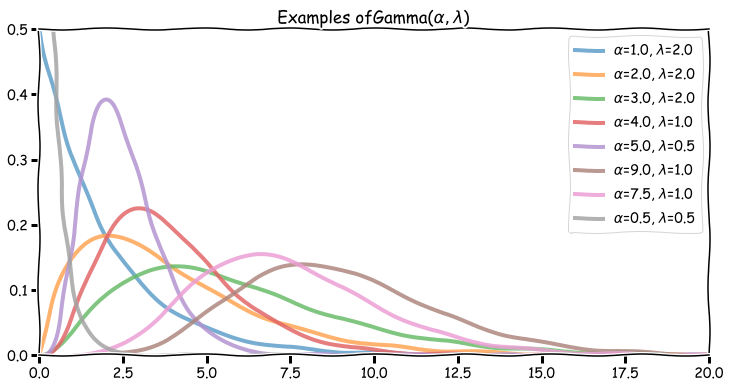

In [2]:
alpha_values  = [1.,2.,3.,4.,5.,9.,7.5,0.5]
lambda_values = [2.,2.,2.,1.,0.5,1.,1.,0.5]
x = np.linspace(0, 20, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(12, 6))

for a,l in zip(alpha_values, lambda_values):
    ax.plot(x, gamma.pdf(x, a, scale=l), lw=4, alpha=0.6, label=r'$\alpha$={}, $\lambda$={}'.format(a,l))
   
plt.xlim((0,20.0))
plt.ylim((0,0.5))
plt.legend()
ax.title.set_text(r'Examples ofGamma($\alpha , \lambda$)')
plt.show()

----

## Connecting the Gamma and Exponential, Poisson Distributions

### Poisson Processes

Recall Poisson processes, where the number of events happening in a certain time period $t$ is such that

\begin{align}
  N_t &= \text{number of events occuring up to time }t \\
      &\sim Pois(\lambda, t)
\end{align}

where the number of events occuring in disjoint time intervals are independent.

Now earlier, we discussed how time $t$ is exponential. Consider $t_1$, the time until we observe the very first event.

\begin{align}
  P(t_1 \gt t) &= P(N_t = 0) &\quad \text{by definition} \\
  &= \frac{\lambda^0 \, e^{\lambda t}}{0!} \\
  &= e^{\lambda t} \\
  &= 1 - (1-e^{\lambda t}) &\quad \text{1 - CDF of } Expo(\lambda) \\\\
  \\ 
  \Rightarrow &\text{time until first event } \sim Expo(\lambda)
\end{align}

And so using this argument along with the memorylessness property, all of the other times between subsequent events $t_2, t_3, \dots , t_n$ are also $Expo(\lambda)$

### Analogies: Geometric $\rightarrow$ Negative binomial (discrete); Exponential $\rightarrow$ Gamma (continuous)

So the interarrival time for events in a Poisson process are i.i.d. $Expo(\lambda)$.

But what if we want to know $t_n$, the time of the $n^{th}$ arrival?

\begin{align}
  T_n &= \sum_{i=1}^{n} X_1, X_2, \dots , X_n &\quad \text{where } X_i \text{ is i.i.d. } Expo(\lambda) \\\\
  &\sim Gamma(n, \lambda) &\quad \text{ assuming } n \text{ is an integer} 
\end{align}

Recall the relation between the geometric and negative binomial distributions:
* In geometric $Geom(p)$, we count discrete time until $1^{st}$ success
* In negative binomial $NB(n, p)$, we count discrete time until $n^{th}$ success ($\sum_{i=1}^{n} X_i \text{ where } X_i \text{ i.i.d., } X_i \sim Geom(\lambda)$ )



Well, there's is something analogous between the exponential and Gamma distributions:
* In exponential $Expo(\lambda)$, we count continuous time until $1^{st}$ success
* In Gamma, we count continuous time until $n^{th}$ success ($\sum_{i=1}^{n}  X_i \text{ where } X_i \text{ i.i.d, } X_i \sim Expo(\lambda)$ )

----

## Moments of Gamma

#### $X \sim Gamma(\alpha, 1)$

Let $X \sim Gamma(\alpha,1)$

Directly using LOTUS:

\begin{align}
  \mathbb{E}(X^c) &= \int_{0}^{\infty} \frac{1}{\Gamma(a)} \,x^c \, x^{\alpha} \, e^{-x} \, \frac{dx}{x} \\
  &= \int_{0}^{\infty} \frac{1}{\Gamma(\alpha)} \, x^{a+c} \, e^{-x} \, \frac{dx}{x} \\
  &= \frac{\Gamma(\alpha+c)}{\Gamma(\alpha)} &\quad \text{, where } \alpha+x \gt 0 \\\\
  \\
  1^{st} \text{ moment (mean) of } Gamma(n,1) &= \mathbb{E}(X) \\
  &= \frac{\Gamma(\alpha+1)}{\Gamma(\alpha)} \\
  &= \frac{\alpha \, \Gamma(\alpha)}{\Gamma(\alpha)} \\
  &= \boxed{ \alpha } \\\\
  \\
  2^{nd} \text{ moment } Gamma(n,1) &= \mathbb{E}(X^2) \\
  &= \frac{\Gamma(\alpha+2)}{\Gamma(\alpha)} \\
  &= \frac{(\alpha+1) \, \Gamma(\alpha+1)}{\Gamma(\alpha)} \\
  &= \frac{(\alpha+1)\alpha \, \Gamma(\alpha)}{\Gamma(\alpha)} \\
  &= \alpha^2 + \alpha \\
  \\
  \Rightarrow \text{Var of } Gamma(n,1) &=  \mathbb{E}(X^2) - \left( \mathbb{E}(X)^2 \right) \\
  &= \alpha^2 + \alpha - \alpha^2 \\
  &= \boxed{ \alpha  }
\end{align}

Let $X \sim Gamma(\alpha, \lambda)$

Applying what we know from the case of above and using LOTUS:

\begin{align}
  \mathbb{E}(X^c) &= \int_{0}^{\infty} \frac{1}{\Gamma(\alpha)} \,x^c \, (\lambda x)^{\alpha} \, e^{-\lambda x} \, \frac{dx}{\lambda x} \\
  &= \int_{0}^{\infty} \frac{1}{\Gamma(\alpha)} \, x^{\alpha+c} \, \lambda^{\alpha} \, e^{-\lambda x} \, \frac{dx}{\lambda \, x} \\
  &= \int_{0}^{\infty} \frac{1}{\Gamma(\alpha)} \, (\lambda \, x)^{\alpha+c} \, e^{-\lambda x} \, \frac{dx}{\lambda \, x} \, \frac{1}{\lambda^c} \\
  &= \frac{\Gamma(\alpha+c)}{\Gamma(\alpha) \, \lambda^c} &\quad \text{, where } \alpha+x \gt 0 \\\\
  \\
  1^{st} \text{ moment (mean) of } Gamma(\alpha,\lambda) &= \mathbb{E}(X) \\
  &= \frac{\Gamma(\alpha+1)}{\Gamma(\alpha) \, \lambda} \\
  &= \frac{\alpha \, \Gamma(\alpha)}{\Gamma(\alpha) \, \lambda} \\
  &= \boxed{ \frac{\alpha}{\lambda} } \\\\
  \\
  2^{nd} \text{ moment } Gamma(\alpha,\lambda) &= \mathbb{E}(X^2) \\
  &= \frac{\Gamma(\alpha+2)}{\Gamma(\alpha) \, \lambda^2} \\
  &= \frac{(\alpha+1) \, \Gamma(\alpha+1)}{\Gamma(\alpha) \, \lambda^2} \\
  &= \frac{(\alpha+1)\alpha \, \Gamma(\alpha)}{\Gamma(\alpha) \, \lambda^2} \\
  &= \frac{(\alpha+1)\alpha}{\lambda^2} \\
  \\
  \Rightarrow \text{Var of } Gamma(\alpha,\lambda) &=  \mathbb{E}(X^2) - \left( \mathbb{E}(X)^2 \right) \\
  &= \frac{(\alpha+1)\alpha}{\lambda^2} - \left(  \frac{\alpha}{\lambda} \right)^2 \\
  &= \frac{\alpha + \alpha^2 - \alpha^2}{\lambda^2} \\
  &= \boxed{  \frac{\alpha}{\lambda^2} }
\end{align}